# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

# Step 1: Import Required Libraries

In [3]:

import pandas as pd # data analysis
import numpy as np  # for numerical data
import seaborn as sns # data visualization advanced
import matplotlib.pyplot as plt # basic

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling 
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


# Step 2: Load Dataset

In [8]:
import pandas as pd
df=pd.read_excel(r"C:\Users\murug\Documents\cleaned_dataset.xlsx") # Replace with actual path
years = range(2010, 2017)

# df = pd.read_excel(r"path_data.xlsx")

In [4]:
years[0]

2010

In [20]:
import pandas as pd

# Your Excel file
excel_file = r"C:\Users\murug\Documents\cleaned_dataset.xlsx"

# Assume this is the year you're working with
years = [2010]  # year[0] = 2010

# Since the sheet is not named with the year, just use the real sheet name
sheet_name = 'cleaned_dataset'

# Load the sheet
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Optional: Add the year as a new column if you want to track it
df['Year'] = years[0]

# Show the first few rows
df.head()




,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,4,2,1,4,1,2010
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,3,2,1,1,1,2010
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,2,1,4,1,2010
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,4,2,1,4,1,2010
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,4,2,1,4,1,2010


In [22]:
import pandas as pd

file_path = r"C:\Users\murug\Downloads\emission_factors_large.xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['emission_factors_large']


In [23]:
import pandas as pd

file_path = r"C:\Users\murug\Downloads\emission_factors_large.xlsx"
df_2 = pd.read_excel(file_path, sheet_name='emission_factors_large')
df_2.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111C0,Vegetable farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.292,0.054,0.346,NaN,2,2,2,1,1
1,1111D0,Fruit farming,carbon dioxide,"kg/2018 USD, purchaser price",0.682,0.001,0.683,NaN,2,5,4,2,5
2,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.698,0.005,0.703,NaN,5,4,2,1,1
3,1111C0,Vegetable farming,methane,"kg CO2e/2018 USD, purchaser price",0.969,0.017,0.986,NaN,3,4,1,2,3
4,1111C0,Vegetable farming,nitrous oxide,"kg/2018 USD, purchaser price",0.725,0.025,0.750,NaN,3,2,3,4,5


In [26]:
years = [2010]  # If you still want to track the year

all_data = []

try:
    df_com = pd.read_excel(excel_file, sheet_name='cleaned_dataset')
    df_ind = pd.read_excel(r"C:\Users\murug\Downloads\emission_factors_large.xlsx", sheet_name='emission_factors_large')
    
    df_com['Source'] = 'Commodity'
    df_ind['Source'] = 'Industry'
    df_com['Year'] = df_ind['Year'] = years[0]  # or 2010

    df_com.columns = df_com.columns.str.strip()
    df_ind.columns = df_ind.columns.str.strip()

    df_com.rename(columns={
        'Commodity Code': 'Code',
        'Commodity Name': 'Name'
    }, inplace=True)
    
    df_ind.rename(columns={
        'Industry Code': 'Code',
        'Industry Name': 'Name'
    }, inplace=True)

    all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

except Exception as e:
    print(f"Error: {e}")


In [27]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year,Unnamed: 7
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,4,2,1,4,1,Commodity,2010,NaN
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,3,2,1,1,1,Commodity,2010,NaN
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,2,1,4,1,Commodity,2010,NaN
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,4,2,1,4,1,Commodity,2010,NaN
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,4,2,1,4,1,Commodity,2010,NaN


# Step 3: Data Preprocessing

In [28]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year',
       'Unnamed: 7'],
      dtype='object')

In [29]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [30]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    1264 non-null   object 
 1   Name                                                    1264 non-null   object 
 2   Substance                                               1264 non-null   object 
 3   Unit                                                    1264 non-null   object 
 4   Supply Chain Emission Factors without Margins           1264 non-null   float64
 5   Margins of Supply Chain Emission Factors                1264 non-null   float64
 6   Supply Chain Emission Factors with Margins              1264 non-null   float64
 7   DQ ReliabilityScore of Factors without Margins          1264 non-null   int64  
 8   DQ TemporalCorrelation of Factors with

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,1264.0,0.403556,0.323984,0.0,0.10725,0.3655,0.6685,2.884
Margins of Supply Chain Emission Factors,1264.0,0.041419,0.033362,0.0,0.01000,0.0390,0.0700,0.305
Supply Chain Emission Factors with Margins,1264.0,0.444971,0.336094,0.0,0.14775,0.4095,0.7200,2.884
DQ ReliabilityScore of Factors without Margins,1264.0,3.009494,1.287582,1.0,2.00000,3.0000,4.0000,5.000
DQ TemporalCorrelation of Factors without Margins,1264.0,2.771361,1.312864,1.0,2.00000,2.0000,4.0000,5.000
DQ GeographicalCorrelation of Factors without Margins,1264.0,2.599684,1.497805,1.0,1.00000,2.0000,4.0000,5.000
DQ TechnologicalCorrelation of Factors without Margins,1264.0,2.929589,1.378127,1.0,2.00000,3.0000,4.0000,5.000
DQ DataCollection of Factors without Margins,1264.0,2.571203,1.487236,1.0,1.00000,2.0000,4.0000,5.000
Year,1264.0,2010.000000,0.000000,2010.0,2010.00000,2010.0000,2010.0000,2010.000


In [33]:
df.isnull().sum()

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

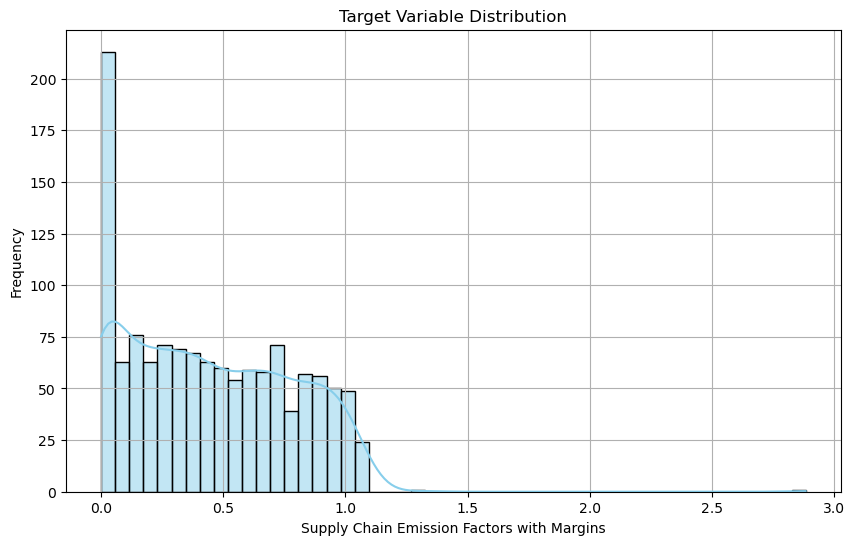

In [35]:
# Visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaN values from the column to avoid issues
data = df['Supply Chain Emission Factors with Margins'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True, color='skyblue')
plt.title('Target Variable Distribution')
plt.xlabel('Supply Chain Emission Factors with Margins')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [36]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    340
other GHGs        322
methane           303
nitrous oxide     299
Name: count, dtype: int64


In [37]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         705
kg CO2e/2018 USD, purchaser price    559
Name: count, dtype: int64


In [38]:
print(df['Source'].value_counts())

Source
Industry     1000
Commodity     264
Name: count, dtype: int64


In [39]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [40]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [41]:
df['Substance']=df['Substance'].map(substance_map)

In [42]:
df['Substance'].unique()

array([0, 1, 2, 3])

In [43]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [44]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [45]:
df['Unit']=df['Unit'].map(unit_map)

In [46]:
print(df['Unit'].unique())

[0 1]


In [47]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [48]:
source_map={'Commodity':0, 'Industry':1}

In [49]:
df['Source']=df['Source'].map(source_map)

In [50]:
print(df['Source'].unique())

[0 1]


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    1264 non-null   object 
 1   Name                                                    1264 non-null   object 
 2   Substance                                               1264 non-null   int64  
 3   Unit                                                    1264 non-null   int64  
 4   Supply Chain Emission Factors without Margins           1264 non-null   float64
 5   Margins of Supply Chain Emission Factors                1264 non-null   float64
 6   Supply Chain Emission Factors with Margins              1264 non-null   float64
 7   DQ ReliabilityScore of Factors without Margins          1264 non-null   int64  
 8   DQ TemporalCorrelation of Factors with

In [52]:
df.Code.unique()

array(['111CA', '113FF', 211, 212, 213, 22, 23, '311FT', '313TT', '315AL',
       321, 322, 323, 324, 325, 326, 327, 331, 332, 333, 334, 335,
       '3361MV', '3364OT', 337, 339, 42, 441, 445, 452, 481, 482, 483,
       484, 485, 486, '487OS', 493, '4A0', 511, 512, 513, 514, '521CI',
       523, 524, 525, '532RL', 5411, '5412OP', 5415, 55, 561, 562, 61,
       621, 622, 623, 624, '711AS', 713, 721, 722, 81, 'HS', 'ORE',
       '1111C0', '1111D0', '1111A0', '1111B0'], dtype=object)

In [53]:
df.Name.unique()

array(['Farms', 'Forestry, fishing, and related activities',
       'Oil and gas extraction', 'Mining, except oil and gas',
       'Support activities for mining', 'Utilities', 'Construction',
       'Food and beverage and tobacco products',
       'Textile mills and textile product mills',
       'Apparel and leather and allied products', 'Wood products',
       'Paper products', 'Printing and related support activities',
       'Petroleum and coal products', 'Chemical products',
       'Plastics and rubber products', 'Nonmetallic mineral products',
       'Primary metals', 'Fabricated metal products', 'Machinery',
       'Computer and electronic products',
       'Electrical equipment, appliances, and components',
       'Motor vehicles, bodies and trailers, and parts',
       'Other transportation equipment', 'Furniture and related products',
       'Miscellaneous manufacturing', 'Wholesale trade',
       'Motor vehicle and parts dealers', 'Food and beverage stores',
       'General

In [33]:
len(df.Name.unique())

713

In [54]:
# Drop non-numeric columns not needed,
# Alos drop Code and Year columns since there is no need of both of the columns
df.drop(columns=['Name','Code','Year'], inplace=True)

In [36]:
# len(df.Code.unique())

In [55]:
df.shape

(1264, 11)

In [56]:
# Define features and target
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

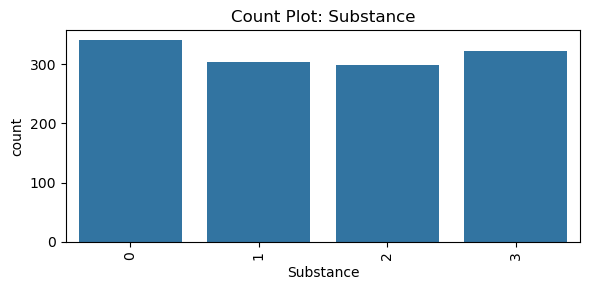

In [57]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

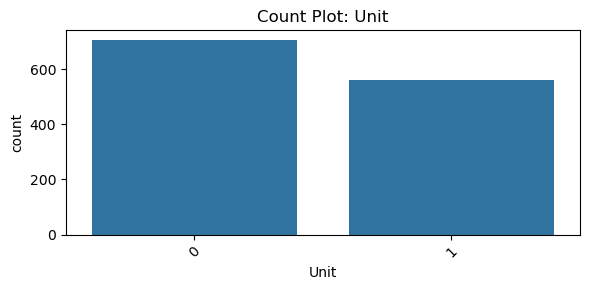

In [58]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


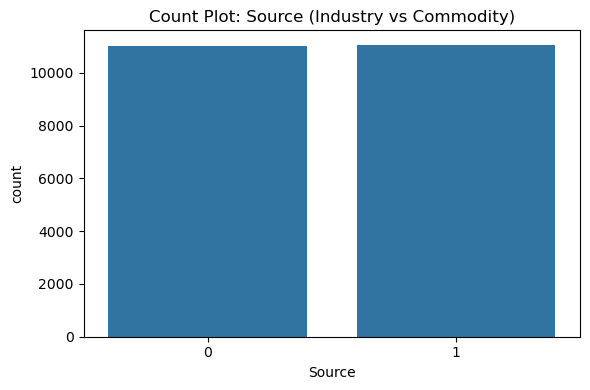

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000,0.527783,-0.068019,-0.027255,-0.068262,0.002847,0.006812,0.007605,0.048642,-0.015157,-0.010351
Unit,0.527783,1.000000,0.099308,0.104563,0.106120,-0.000380,0.075025,0.124243,0.079047,0.086468,0.198888
Supply Chain Emission Factors without Margins,-0.068019,0.099308,1.000000,0.318193,0.995562,-0.164116,0.158640,0.272693,0.036765,0.263227,0.517889
Margins of Supply Chain Emission Factors,-0.027255,0.104563,0.318193,1.000000,0.405999,-0.054614,0.188199,0.317895,0.014108,0.334644,0.576633
Supply Chain Emission Factors with Margins,-0.068262,0.106120,0.995562,0.405999,1.000000,-0.163626,0.171613,0.294435,0.036847,0.286973,0.556490
DQ ReliabilityScore of Factors without Margins,0.002847,-0.000380,-0.164116,-0.054614,-0.163626,1.000000,-0.084429,-0.134741,0.017779,-0.086768,-0.167083
DQ TemporalCorrelation of Factors without Margins,0.006812,0.075025,0.158640,0.188199,0.171613,-0.084429,1.000000,0.124944,-0.050915,0.201973,0.302003
DQ GeographicalCorrelation of Factors without Margins,0.007605,0.124243,0.272693,0.317895,0.294435,-0.134741,0.124944,1.000000,0.013568,0.309595,0.548975
DQ TechnologicalCorrelation of Factors without Margins,0.048642,0.079047,0.036765,0.014108,0.036847,0.017779,-0.050915,0.013568,1.000000,0.003800,0.038727
DQ DataCollection of Factors without Margins,-0.015157,0.086468,0.263227,0.334644,0.286973,-0.086768,0.201973,0.309595,0.003800,1.000000,0.543033


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               1264 non-null   int64  
 1   Unit                                                    1264 non-null   int64  
 2   Supply Chain Emission Factors without Margins           1264 non-null   float64
 3   Margins of Supply Chain Emission Factors                1264 non-null   float64
 4   Supply Chain Emission Factors with Margins              1264 non-null   float64
 5   DQ ReliabilityScore of Factors without Margins          1264 non-null   int64  
 6   DQ TemporalCorrelation of Factors without Margins       1264 non-null   int64  
 7   DQ GeographicalCorrelation of Factors without Margins   1264 non-null   int64  
 8   DQ TechnologicalCorrelation of Factors

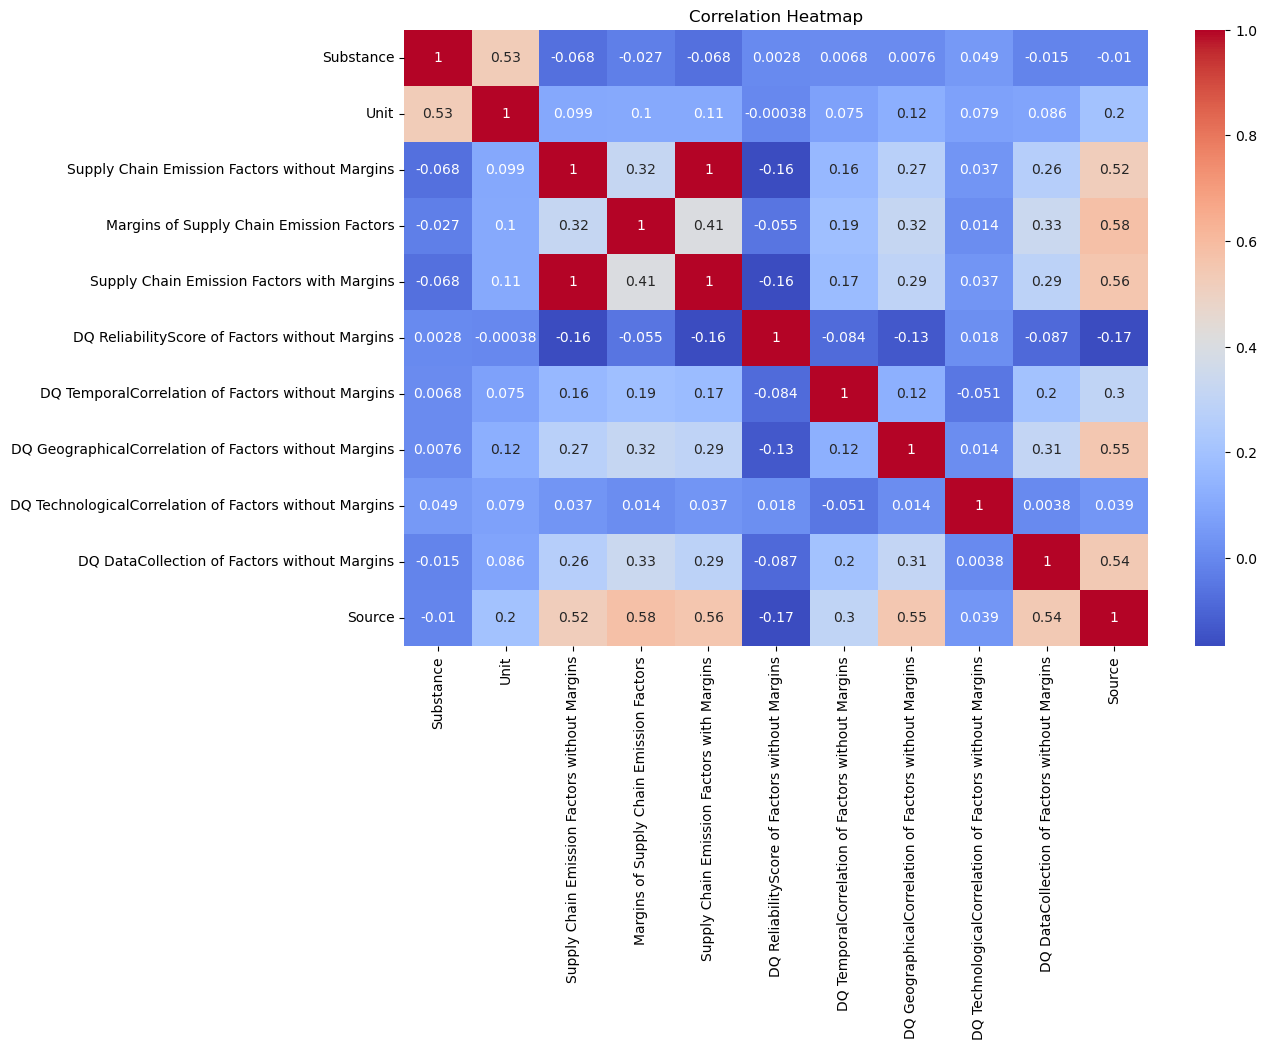

In [62]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Normalize features

In [66]:
# Normalize features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Assume X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Divide the data into train and test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Select the model for training

In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

### Training

In [70]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Prediction anf Evaluation

In [71]:
y_pred = model.predict(X_test)
# r2_sccore approx 1 gives us perfecr model

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.008846021324902682
R² Score: 0.999248841731761


### Hyperparameter Tuning

In [76]:
# When the model performs very well on the training data we say that it is overfit
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


### Use best parameters for prediction

In [77]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))

Final RMSE: 0.008694976772479728
Final R²: 0.9992742745715877


### Save model and encoders

In [51]:
!mkdir models

A subdirectory or file models already exists.


In [79]:
import os

# Create directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Now save the model and scaler
import joblib
joblib.dump(best_model, 'models/final_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')



['models/scaler.pkl']

In [80]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [81]:
import zipfile
import os

# Files to include
files_to_zip = ['models/final_model.pkl', 'models/scaler.pkl']

# Create a ZIP file
with zipfile.ZipFile('models/model_archive.zip', 'w') as zipf:
    for file in files_to_zip:
        zipf.write(file, os.path.basename(file))  # store without full path

print("Model files zipped successfully as 'models/model_archive.zip'")


Model files zipped successfully as 'models/model_archive.zip'
